## Series Temporales - Trabajo Práctico
### Alumna: Ariadna Garmendia

### Tema: Análisis de cantidad de pasajeros que pasaron por los molinetes del subte en la Ciudad Autónoma de Buenos Aires entre 2017 y 2019.

### ANÁLISIS ESPECTRAL

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime
import seaborn as sns
from scipy.stats import boxcox 
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.statespace import sarimax
from scripts.import_data import data

#### Importo datos procesados en otras notebooks

In [13]:
molinetes, rolling_median, difference, de_trend = data()

#### Hago el análisis espectral para verificar las componentes cíclicas que tiene mi serie

In [14]:
from scipy import signal

In [15]:
molinetes.tail()

,total
fecha,
2019-12-27,1080310.0
2019-12-28,408094.0
2019-12-29,213081.0
2019-12-30,865096.0
2019-12-31,307615.0


In [28]:
# Mi dataset tiene 3 años de datos (1092 muestras), para hacer el periodograma tomo 2 años de datos (2018 y 2019)
molinetes_sampled = molinetes.iloc[365:1092]
molinetes_sampled.head(), molinetes_sampled.shape

(               total
 fecha               
 2018-01-01  108483.0
 2018-01-02  898909.0
 2018-01-03  970114.0
 2018-01-04  929510.0
 2018-01-05  950626.0,
 (727, 1))

Text(0, 0.5, 'Densidad Espectral de Potencia')

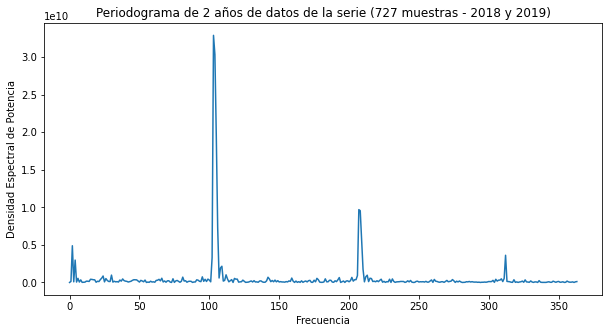

In [41]:
N = 727 # Número de muestras
f, Pxx_den = signal.periodogram(molinetes_sampled.total, N)
plt.figure(figsize=[10,5])
plt.plot(f, Pxx_den)
plt.title('Periodograma de 2 años de datos de la serie (727 muestras - 2018 y 2019)')
plt.xlabel('Frecuencia')
plt.ylabel('Densidad Espectral de Potencia')

#### Se observan 4 componentes en el dominio de la frecuencia: La más importante en 103, la que sigue en 207, en 2 y 312. En el dominio del tiempo, estas frecuencias corresponden a un ciclo de 7 días (componente principal), 3,5 días, 365 (anual), y en 2,33 días respectivamente.

#### Cambio la escala de los gráficos para ver mejor las componentes

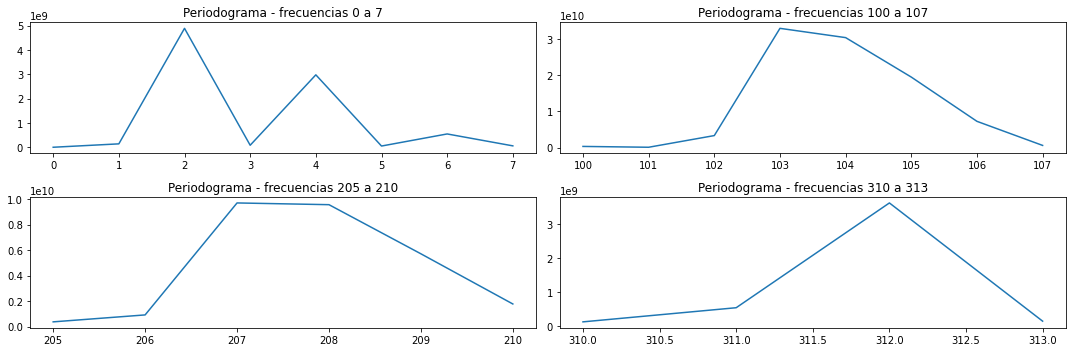

In [38]:
periodogram = pd.DataFrame(f, columns=['freq'])
periodogram['PSD'] = Pxx_den
periodogram.set_index(keys='freq', inplace=True)

fig, ax = plt.subplots(2,2,figsize=(15,5))
ax[0,0].plot(periodogram.PSD[0:7])
ax[0,0].set_title('Periodograma - frecuencias 0 a 7')
ax[0,1].plot(periodogram.PSD[100:107])
ax[0,1].set_title('Periodograma - frecuencias 100 a 107')
ax[1,0].plot(periodogram.PSD[205:210])
ax[1,0].set_title('Periodograma - frecuencias 205 a 210')
ax[1,1].plot(periodogram.PSD[310:313])
ax[1,1].set_title('Periodograma - frecuencias 310 a 313')
plt.tight_layout()

#### Cambiando la escala, se observa que hay más componentes, por ejemplo en 4, aunque de menor amplitud. Esta componente corresponde a 180 días aprox. También se observan algunas frecuencias consecutivas en 103-104 y 207-208 pero en términos de cálculos corresponden aprox al mismo ciclo en el dominio temporal (7 y 3.5 días).

#### Pruebo hacer el Periodograma de la serie suavizada con mediana móvil y k=30, tomando 1 año de datos

In [19]:
# Tomo los datos de la serie suavizada
smoothed = pd.DataFrame(rolling_median.result_30.iloc[30:])


In [31]:
# Me quedo con 1 año exacto de datos
smoothed_sampled = smoothed.iloc[335:1092]
smoothed_sampled.head()

,result_30
fecha,
2018-01-01,1000707.0
2018-01-02,1000707.0
2018-01-03,957167.0
2018-01-04,936865.0
2018-01-05,936865.0


Text(0.5, 0, 'Frecuencia')

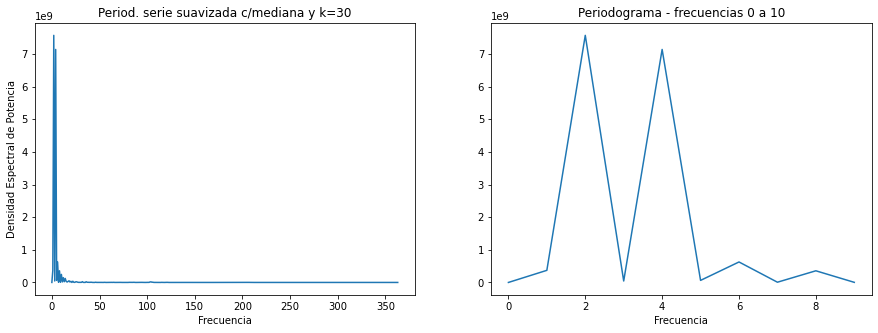

In [43]:
f2, Pxx_den_2 = signal.periodogram(smoothed_sampled.result_30, N)
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Period. serie suavizada c/mediana y k=30')
ax[0].plot(f2, Pxx_den_2)
ax[0].set_xlabel('Frecuencia')
ax[0].set_ylabel('Densidad Espectral de Potencia')
ax[1].set_title('Periodograma - frecuencias 0 a 10')
ax[1].plot(f2[0:10], Pxx_den_2[0:10])
ax[1].set_xlabel('Frecuencia')


#### El periodograma de la serie transformada con mediana móvil con k=30, muestra solo 2 componentes de frecuencia, en 2 y en 4 (ciclos aprox semestral y anual, respectivamente). Esto tiene sentido porque al tomar k=30, estoy suavizando los ciclos de 3,5 y 7 días, con lo cual esas componentes de alta frecuencia ya no aparecen en el periodograma.